## Supraja Rapuru - DSC 630 - Assignment 3.2

## Improve MLB Attendence

## Problem Statement:
My hypothesis is Day of the week, Weather and kind of promotions offered would attract more people to attend the game.
So i am going to explore the data and understand,
* On what day the attendence is more? Idea is to run promotions to increase attendence.
* what are significant factors contributing to improve attendence? Other than pormotions or there any other factors to consider?

Trying with two different approaches to solve this problem.

**Approach 1** - Check the attendance count for day of the week and month and suggest day on which we could run promotions
to increase the attendence.

**Approach 2** - Finding factors that impact attendance increase, correlating factors with attendance and see what are the different factors correlate and their strength and direction of 
correlation

In [49]:
#Import required libraries
import numpy as np  # for numeric operations
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization
from sklearn.preprocessing import LabelEncoder

In [50]:
# import the dataset
dodgers = pd.read_csv("dodgers-2022.csv")

In [51]:
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


## Exploratory Analysis:

In [52]:
# statistical information about data
dodgers.describe(include='all')

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81.000000,81.000000,81,81,81.000000,81,81,81,81,81,81
unique,7,NaN,NaN,7,17,NaN,2,2,2,2,2,2
top,MAY,NaN,NaN,Tuesday,Giants,NaN,Clear,Night,NO,NO,NO,NO
freq,18,NaN,NaN,13,9,NaN,62,66,79,78,67,70
mean,NaN,16.135802,41040.074074,NaN,NaN,73.148148,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.605666,8297.539460,NaN,NaN,8.317318,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,24312.000000,NaN,NaN,54.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.000000,34493.000000,NaN,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,15.000000,40284.000000,NaN,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,25.000000,46588.000000,NaN,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,NaN


Initial observation is Day of the week Tuesday and month May stood in the top. The average footfall is 40K+ and the maximum is 56K

<AxesSubplot:>

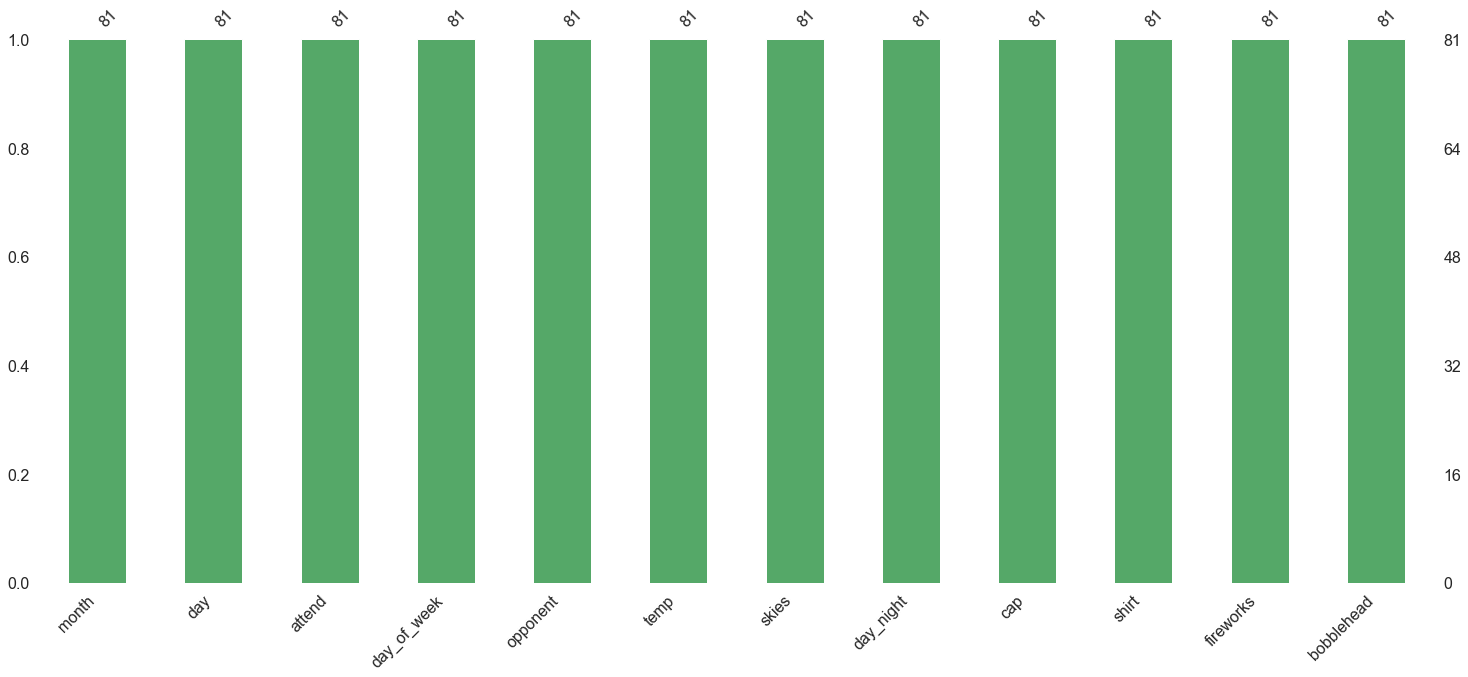

In [53]:
# see if any missing values in thye data
import missingno as msno
msno.bar(dodgers, color='g')

Based on above bar charts we can see that there are no missing values in the data set

C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


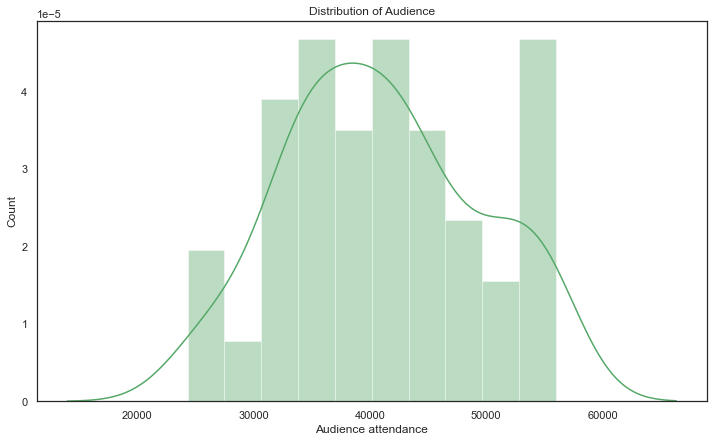

In [54]:
# distribution of independnet variable attend
sns.set(style='white')
plt.figure(figsize=(12,7))
sns.distplot(a=dodgers['attend'],color='g', bins=10)
plt.title("Distribution of Audience")
plt.xlabel('Audience attendance')
plt.ylabel('Count');

Based on above distribution plot, we see that the attendance is normally distributed and average attendance is around 40K in each game.
Also, we do not see any outliers in the attendance.

C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


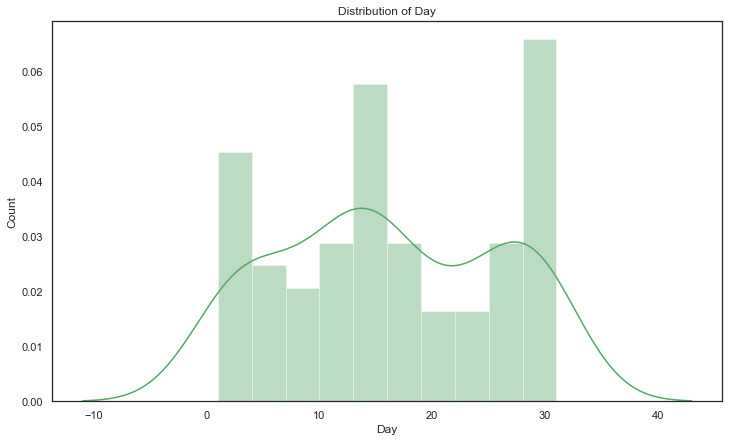

In [55]:
# distribution of variable day
sns.set(style='white')
plt.figure(figsize=(12,7))

sns.distplot(a=dodgers['day'],color='g', bins=10)
plt.title("Distribution of Day")
plt.xlabel('Day')
plt.ylabel('Count');

Based on above distribution chart we see the day variable is almost uniformly distributed, the Game frequency accross different days is almost same, there are few days such as day 30, 15 & 1 game happens most.

## Approach 1 - Check the attendance count for day of the week and month

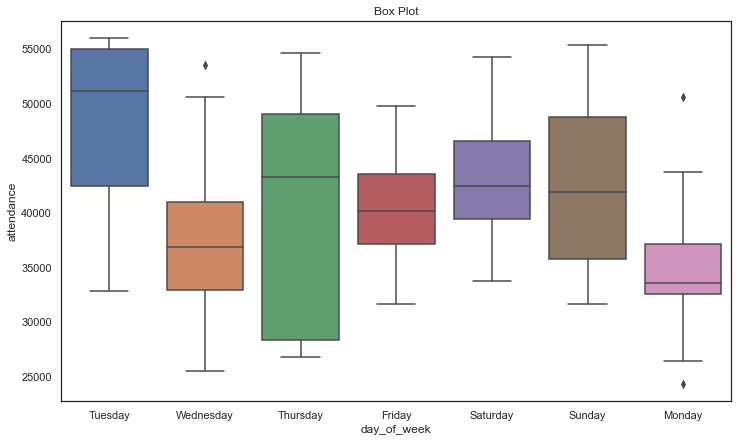

In [56]:
# distribution of  variable day_of_week
sns.set(style='white')
plt.figure(figsize=(12,7))

sns.boxplot(data=dodgers, x='day_of_week',y='attend')
plt.title("Box Plot")
plt.xlabel('day_of_week')
plt.ylabel('attendance');

Based on above box plots, we see that Tuesday is the day wherein median attendance is highest compared to other days and overall attendance is higher on tuesdays.
The 25 percentile attendance on Tuedays is higher than all other days median or 50 percentile attedance.

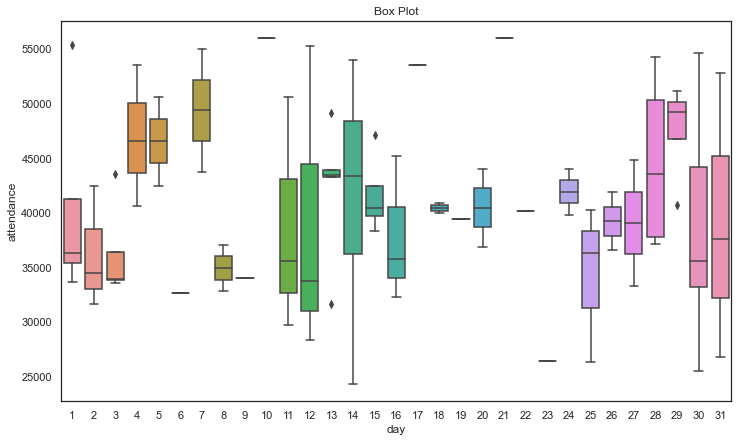

In [57]:
# distribution of  variable day

sns.set(style='white')
plt.figure(figsize=(12,7))

sns.boxplot(data=dodgers, x='day',y='attend')
plt.title("Box Plot")
plt.xlabel('day')
plt.ylabel('attendance');

Based on above box chart the day 7th which has highest median value of attendance compared to other days and minimum number of attendance on this day is more than most of the days median or 75% percentile of other days.
This is the day where attendance is more.

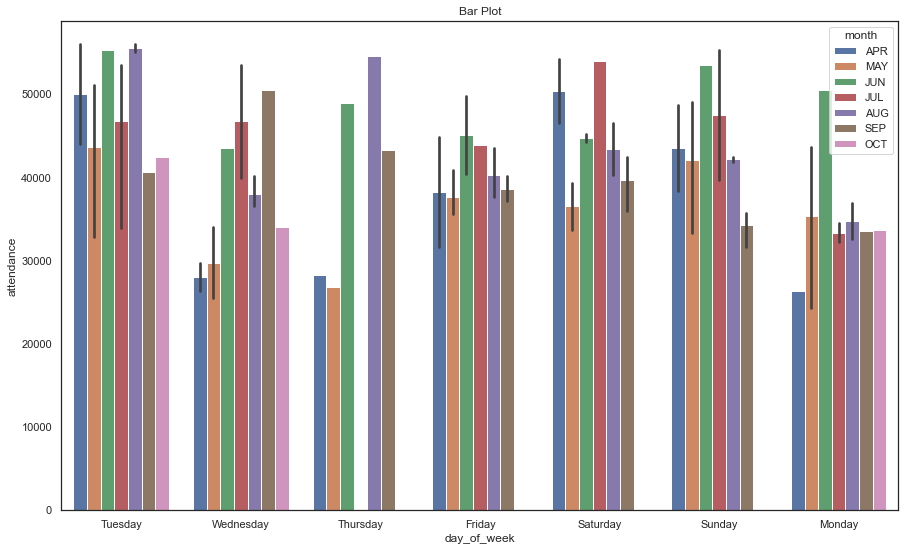

In [58]:
# distribution of  variable day_of_week & month

sns.set(style='white')
plt.figure(figsize=(15,9))

sns.barplot(data=dodgers, x='day_of_week',y='attend', hue='month',estimator=np.mean)
plt.title("Bar Plot")
plt.xlabel('day_of_week')
plt.ylabel('attendance');

Based on above bar charts we see that Tuesday is the day wherein average attendance is highest accross all the month when compared to different days of the week and months.
Tuedays got more than average 40K attendance every month which is above average of other days.

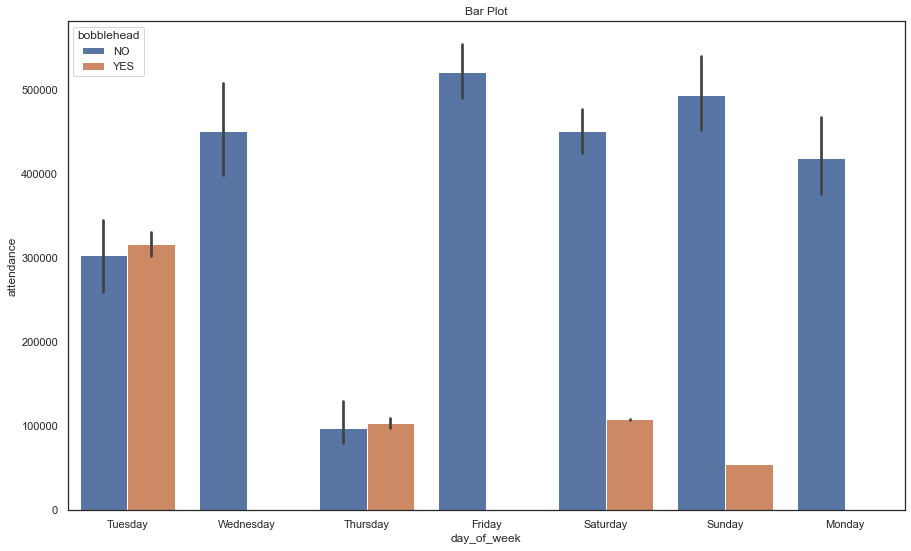

In [59]:
# day of week distribution to see attendance

sns.set(style='white')
plt.figure(figsize=(15,9))

sns.barplot(data=dodgers, x='day_of_week',y='attend', hue='bobblehead',estimator=sum)
plt.title("Bar Plot")
plt.xlabel('day_of_week')
plt.ylabel('attendance');

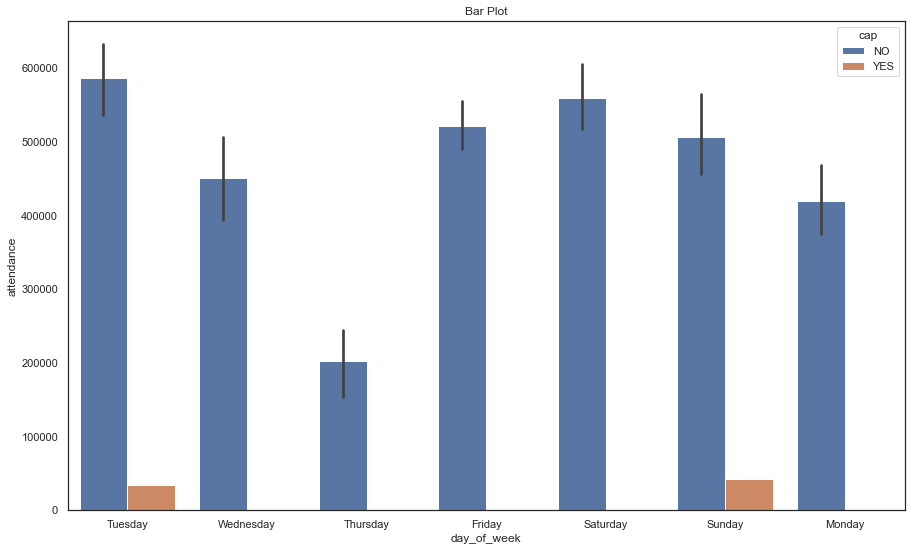

In [60]:
# day of week distribution to see attendance

sns.set(style='white')
plt.figure(figsize=(15,9))

sns.barplot(data=dodgers, x='day_of_week',y='attend', hue='cap',estimator=sum)
plt.title("Bar Plot")
plt.xlabel('day_of_week')
plt.ylabel('attendance');

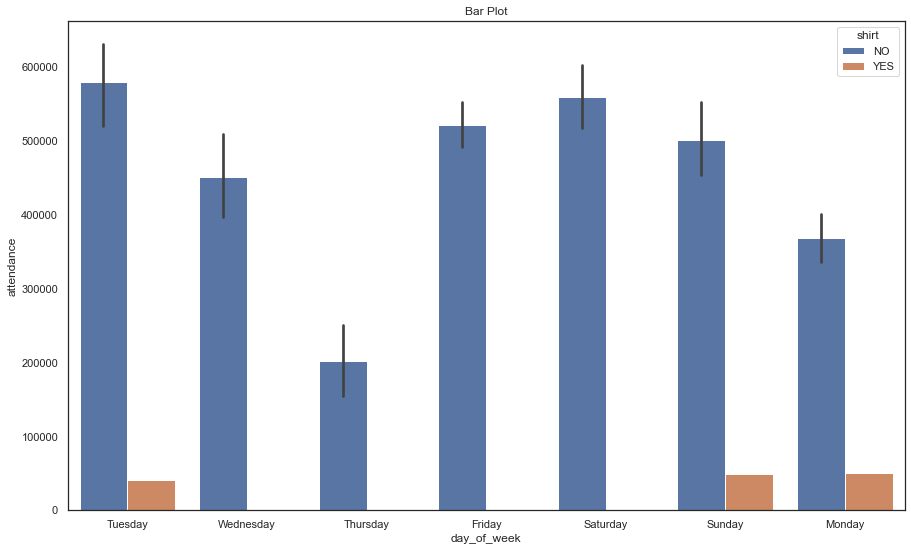

In [61]:
# day of week distribution to see attendance

sns.set(style='white')
plt.figure(figsize=(15,9))

sns.barplot(data=dodgers, x='day_of_week',y='attend', hue='shirt',estimator=sum)
plt.title("Bar Plot")
plt.xlabel('day_of_week')
plt.ylabel('attendance');

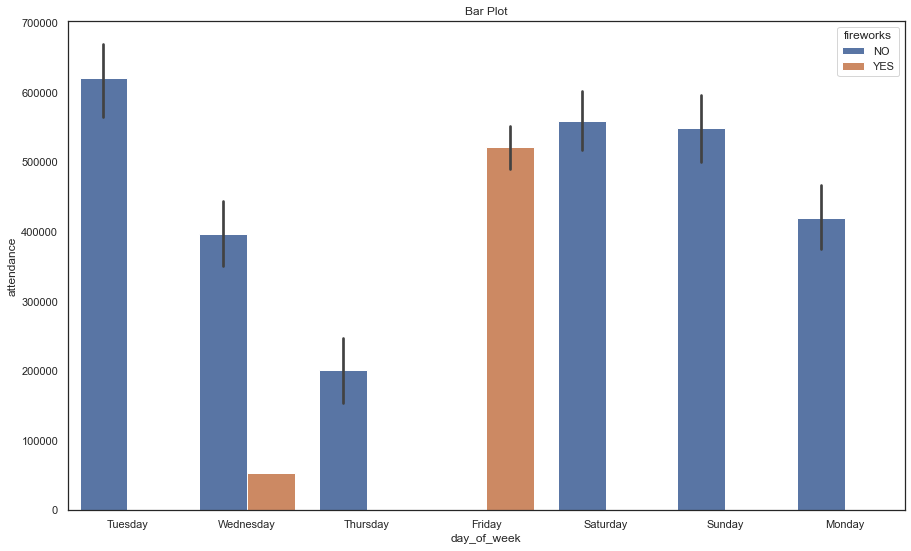

In [62]:
# day of week distribution to see attendance

sns.set(style='white')
plt.figure(figsize=(15,9))

sns.barplot(data=dodgers, x='day_of_week',y='attend', hue='fireworks',estimator=sum)
plt.title("Bar Plot")
plt.xlabel('day_of_week')
plt.ylabel('attendance');

Based on above bar chart, out of all the promotions offered, we see that when bobble head is distributed or offered the attendance is higher so it is playing important role in marketing promotion. On Tuesday we see the attendance is highest when bobble head is offered.

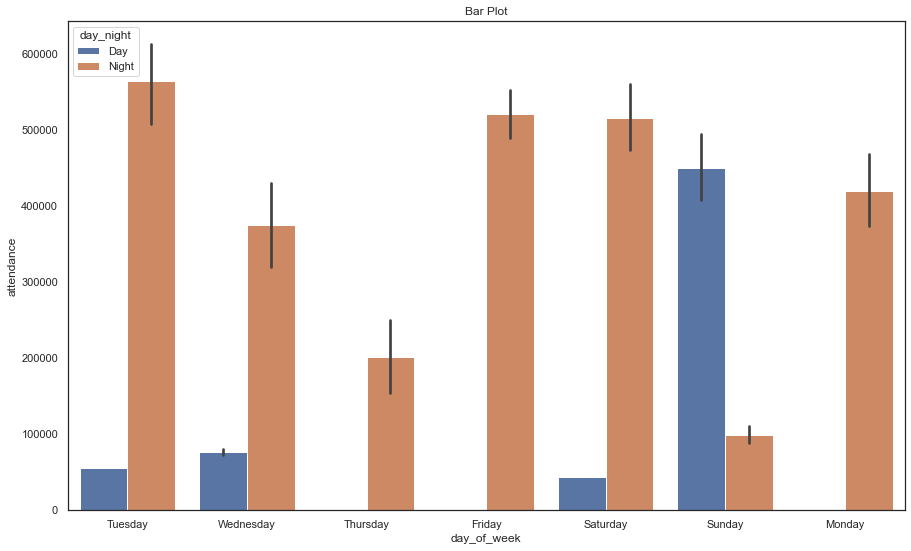

In [63]:
# day of week distribution to see attendance

sns.set(style='white')
plt.figure(figsize=(15,9))

sns.barplot(data=dodgers, x='day_of_week',y='attend', hue='day_night',estimator=sum)
plt.title("Bar Plot")
plt.xlabel('day_of_week')
plt.ylabel('attendance');

The above bar chart shows that when game is conducted on night , the attendance is higher and again Tuesday is the day we see highest number of attendance compared to other days.

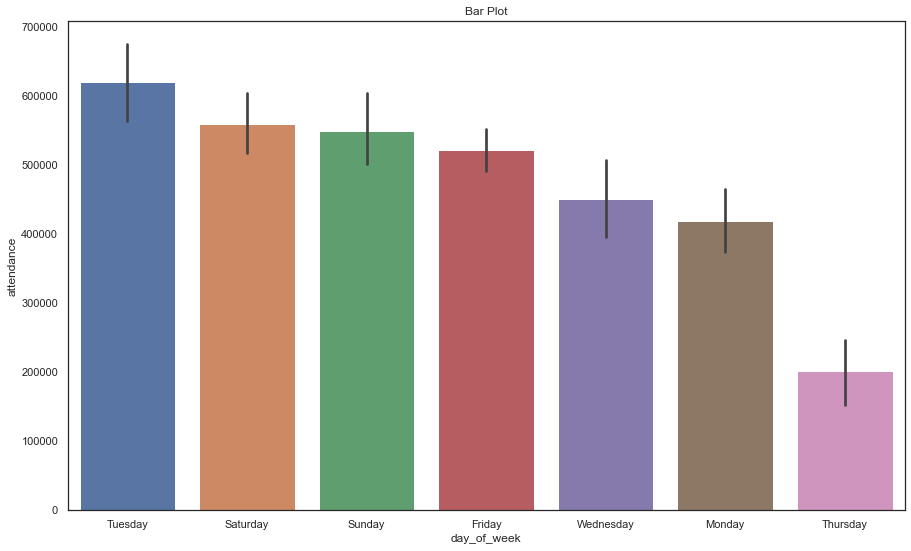

In [64]:
# distribution of  variable day_of_week

sns.set(style='white')
plt.figure(figsize=(15,9))

sns.barplot(data=dodgers, x='day_of_week',y= 'attend', estimator=sum, order = ['Tuesday','Saturday','Sunday','Friday','Wednesday','Monday','Thursday'])
plt.title("Bar Plot")
plt.xlabel('day_of_week')
plt.ylabel('attendance');

Based on above bar chart, we see that Tuesday is the day of the week where most audience attended the game comapred to other days in entire season of MLB.
Thursday is the day of week where least audience attended the game.
Based on all above bar charts we can determine that **Tuesday** is the day of the week accross all of the months the higest number of audience attended the game, so it is best day for marketing promotion.

## Approach 2 - Finding factors that impact attendance increase, correlating factors with attendance and see what are the different factors correlate and their strength and direction of correaltion.

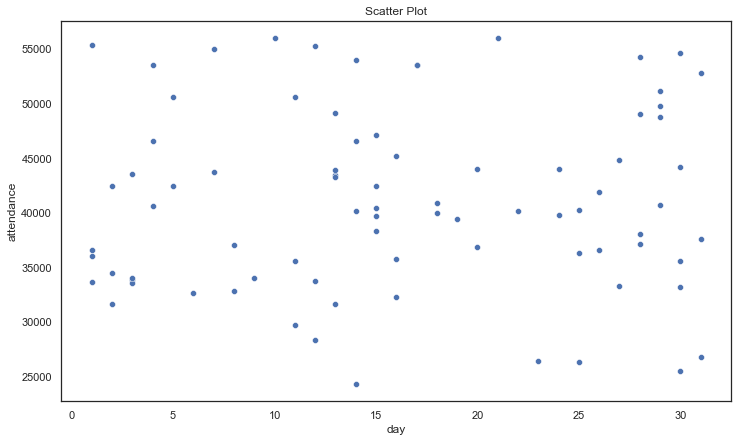

In [65]:
# scatter plot to see correlations

sns.set(style='white')
plt.figure(figsize=(12,7))

sns.scatterplot(data=dodgers, y='attend',x='day')
plt.title("Scatter Plot")
plt.ylabel('attendance')
plt.xlabel('day');

Based on above chart we do not see strong correlation but as day increases the attendance as well.

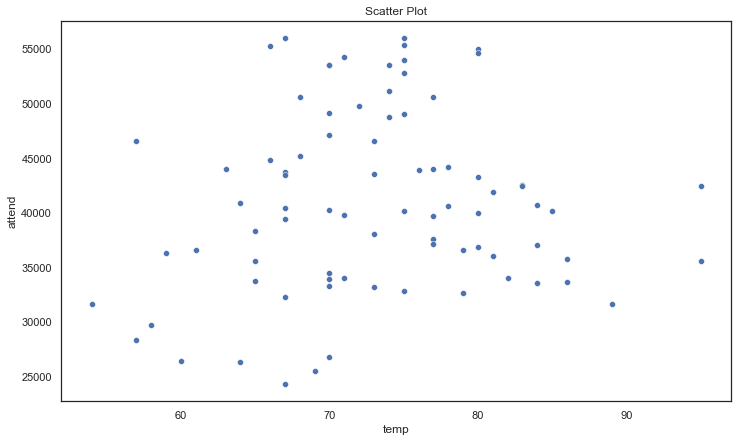

In [66]:
# scatter plot to see correlations

sns.set(style='white')
plt.figure(figsize=(12,7))

sns.scatterplot(data=dodgers, y='attend',x='temp')
plt.title("Scatter Plot")
plt.ylabel('attend')
plt.xlabel('temp');

Based on above scatter chart we can say that as temperatures become warmer audience increases but as temperature gets hotter above 80F the audience decreases.

## Feature Engineering:

In [67]:
# create new variables by combining day of the week and month,day, day of week and month

dodgers['day_of_week_month'] = dodgers['month']+'-'+dodgers['day_of_week']

In [68]:
# display head of the df

dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,day_of_week_month
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,APR-Tuesday
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,APR-Wednesday
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,APR-Thursday
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,APR-Friday
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,APR-Saturday


In [69]:
# encode the categorical features

from sklearn.preprocessing import StandardScaler, OrdinalEncoder

enc = OrdinalEncoder()

sc = StandardScaler()

cat_cols = ['month', 'day_of_week', 'opponent', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead','day_of_week_month']

for col in cat_cols:
    dodgers[col] = enc.fit_transform(dodgers[[col]])

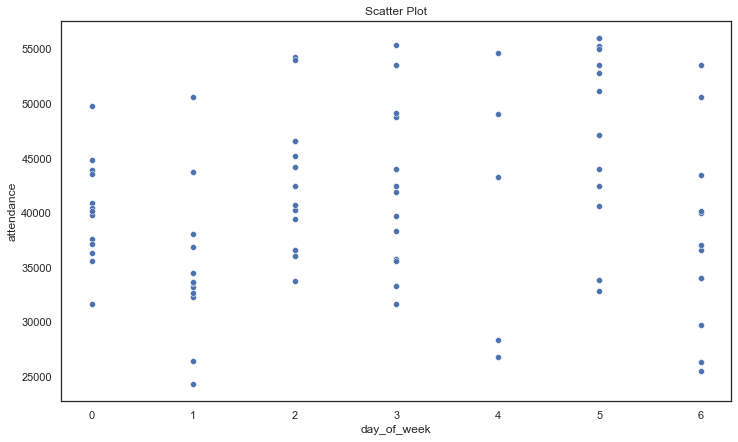

In [70]:
# scatter plot of day of week enc and attend 

sns.set(style='white')
plt.figure(figsize=(12,7))

sns.scatterplot(data=dodgers, x='day_of_week',y='attend')

plt.title("Scatter Plot")
plt.ylabel('attendance')
plt.xlabel('day_of_week');

Based on above scatter plot we do not see any strong correlation of day of the week with attendance.

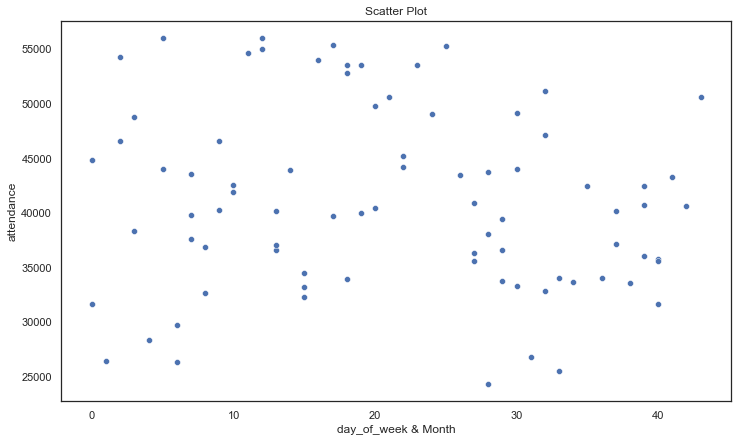

In [71]:
sns.set(style='white')
plt.figure(figsize=(12,7))

sns.scatterplot(data=dodgers, x='day_of_week_month',y='attend')

plt.title("Scatter Plot")
plt.xlabel('day_of_week & Month')
plt.ylabel('attendance');

Based on above scatter plot we don't see any correaltion between attendance and day and month. 

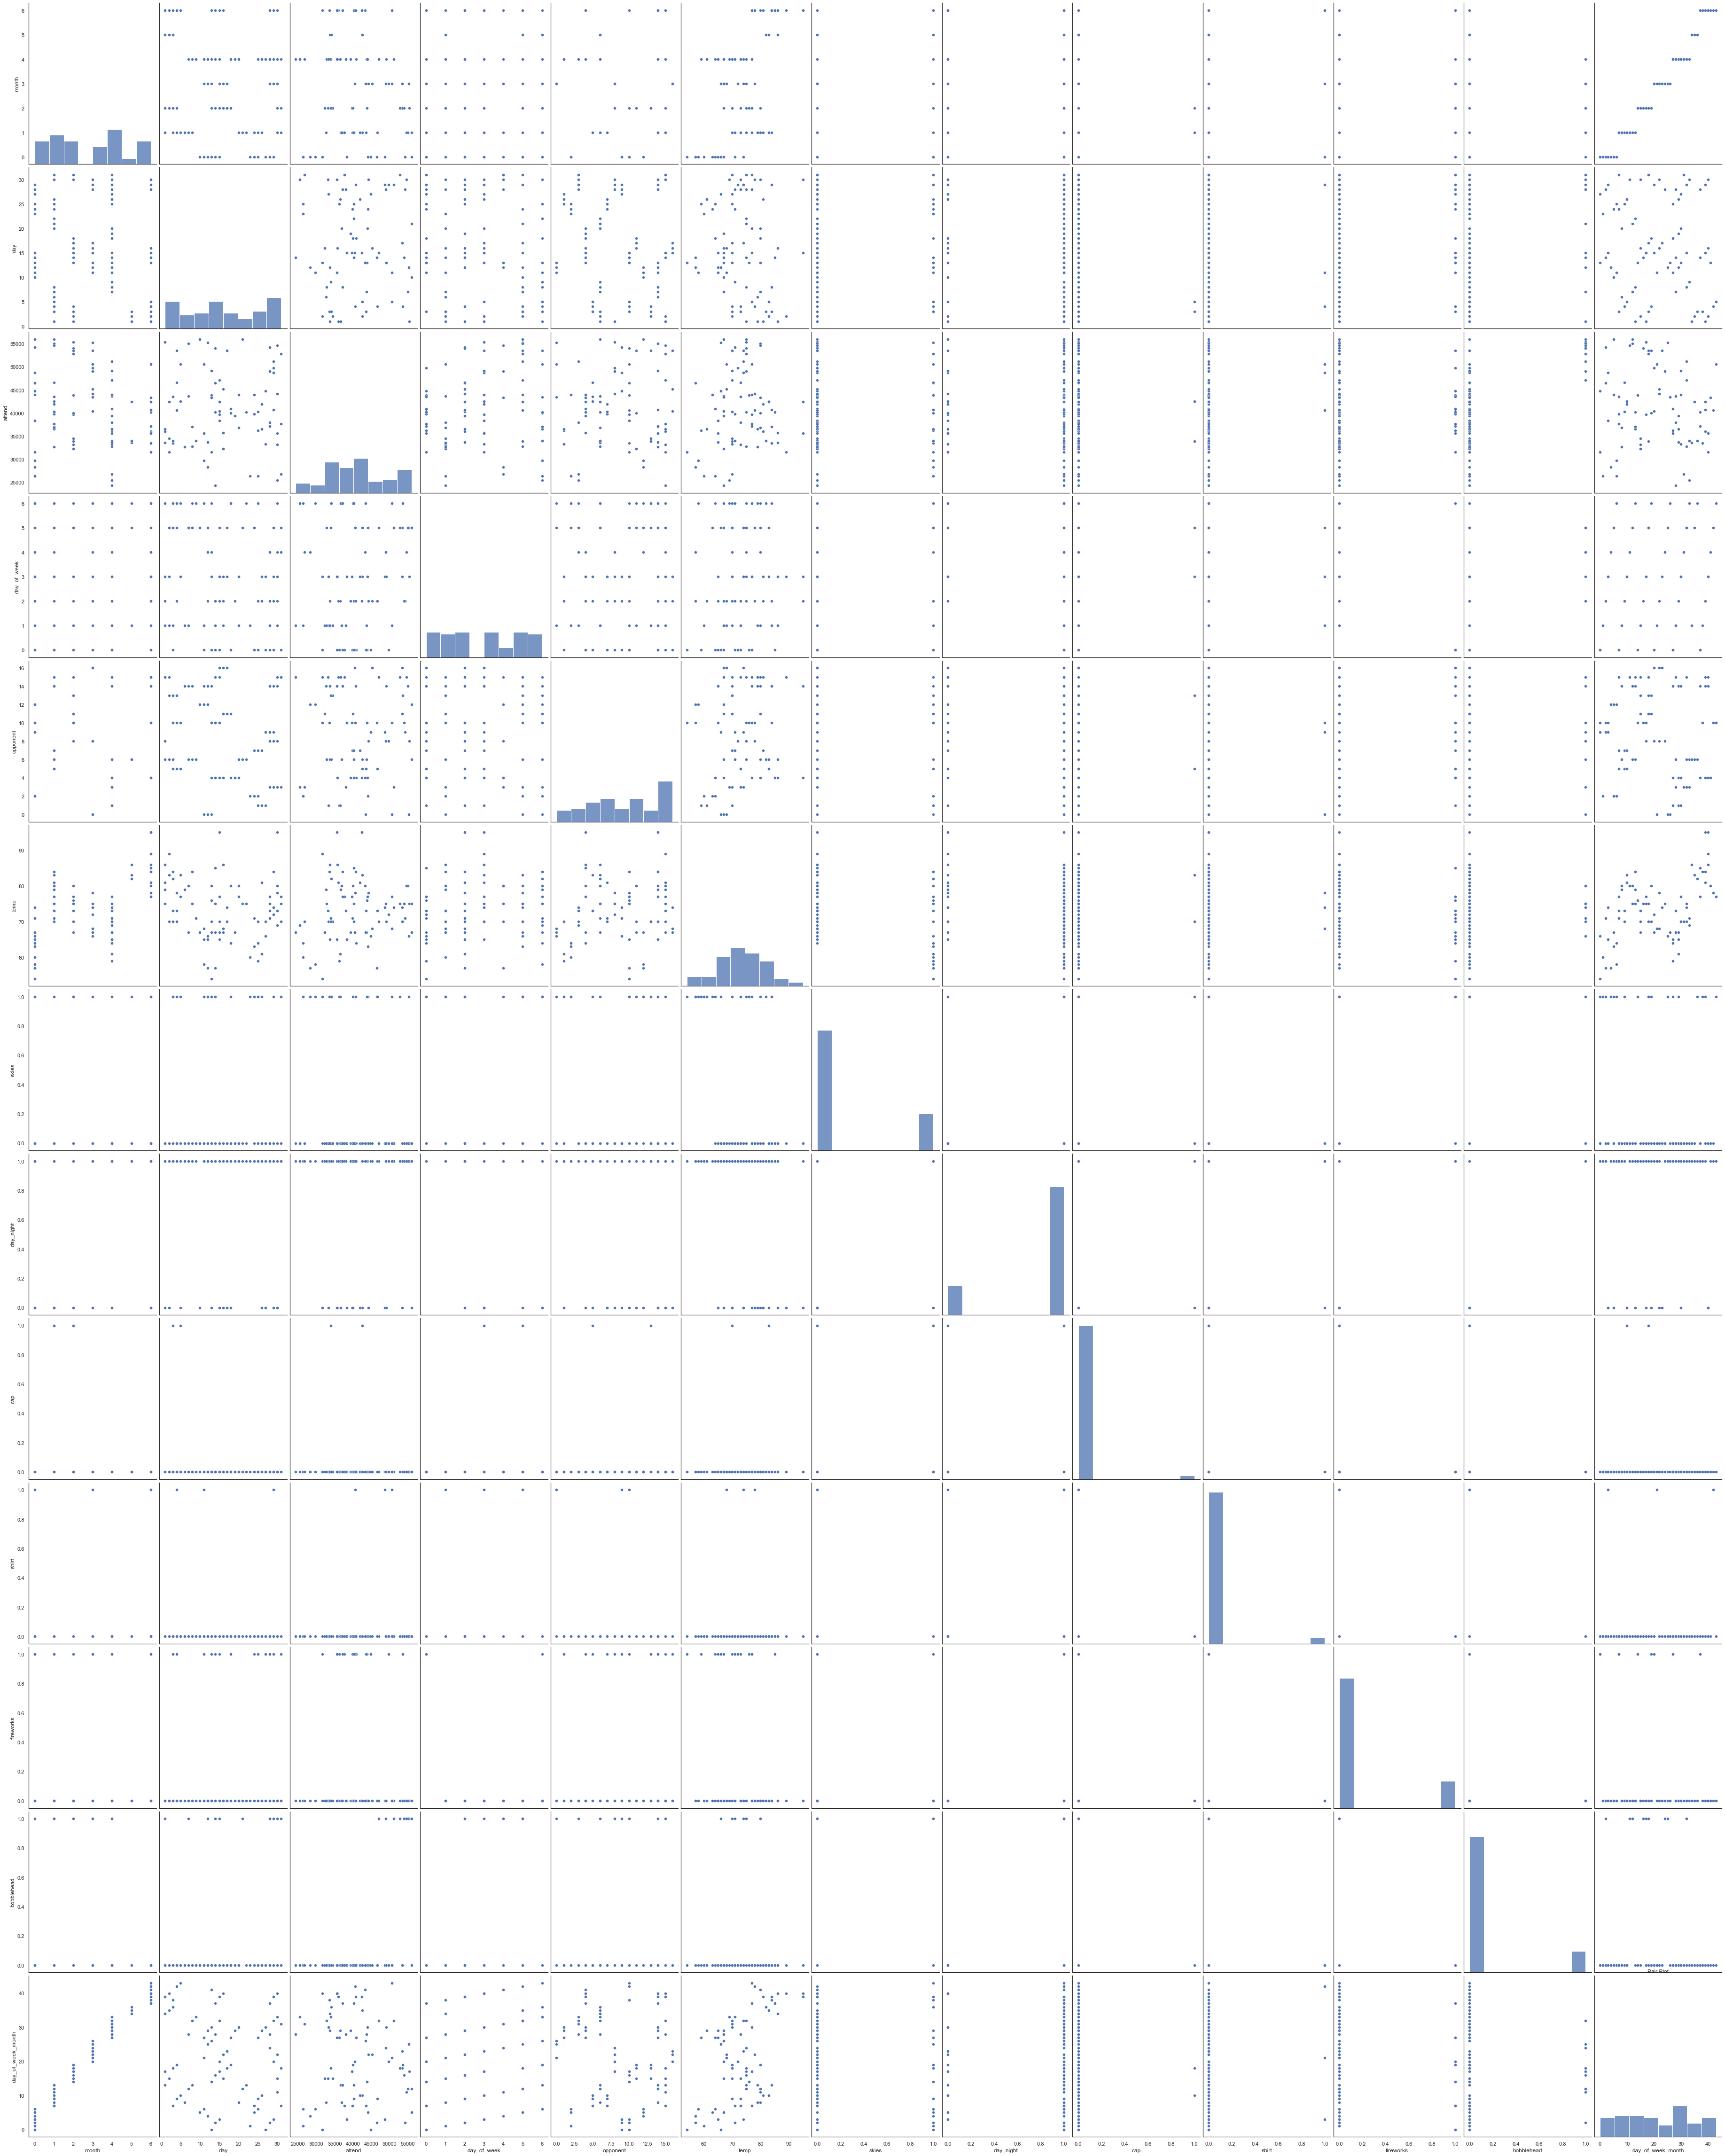

In [72]:
# pair plot to see pair wise correaltions

sns.set(style='white')

sns.pairplot(data=dodgers,height=5, aspect=0.8)
plt.title("Pair Plot");

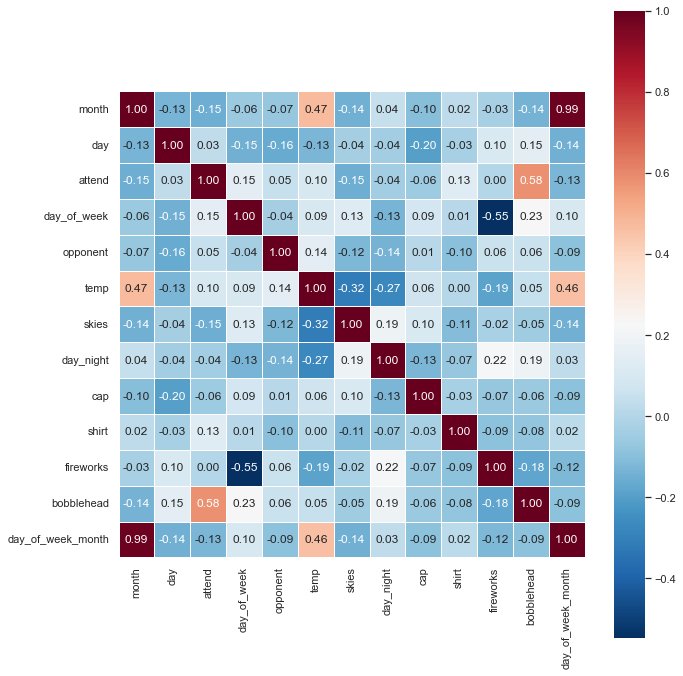

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(dodgers._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

Based on above correlation/heatmap chat we see the correlation coefficient values for each pair and the dark red is color more stronger correlated those are or number above 0.70 are strongly correlated to each other. The positive number shows positive correlation and negative number shows negative correlation.

In [74]:
# display correlation coef. of attend feature

dodgers.corr(method='pearson').iloc[2].sort_values(ascending=False)

attend               1.000000
bobblehead           0.581895
day_of_week          0.147216
shirt                0.133269
temp                 0.098951
opponent             0.045021
day                  0.027093
fireworks            0.002094
day_night           -0.043544
cap                 -0.055002
day_of_week_month   -0.128691
skies               -0.150963
month               -0.152777
Name: attend, dtype: float64

These are correlation coef. values shows that bobblehead has highest value than other features with attend. That means if bobble head is distributed in the marketing people attend the game more. Also, the day of the week corr.coef value is 0.15 which positive so it is positively correlated to attendance and we already seen that Tuesday is the day we get more attendance.

### Modeling:

Lets run regression model on attend and other exploratory features.

In [75]:
# split data into independent features and dependent feature

X = dodgers[['month', 'day', 'day_of_week', 'opponent', 'temp', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead','day_of_week_month']]
y = dodgers['attend']

In [76]:
# save feature names

feature_names = ['month', 'day', 'day_of_week', 'opponent', 'temp', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead','day_of_week_month']

In [77]:
# transform the data to std scaler

X = sc.fit_transform(X)

y = sc.fit_transform(y.values.reshape(-1,1))

In [78]:
X_features = pd.DataFrame(X,columns=feature_names)  # to see features names in model summary

In [79]:
# use statsmodel to run linear regression model

import statsmodels.api as sm 

model = sm.OLS(y, sm.add_constant(X_features)).fit()

In [80]:
# print the summary of model result

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     4.724
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           1.49e-05
Time:                        20:54:12   Log-Likelihood:                -90.377
No. Observations:                  81   AIC:                             206.8
Df Residuals:                      68   BIC:                             237.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.457e-16      0.090   1.63e-15      1.000      -0.179       0.179
month                 0.6911      1.591      0.434      0.665      -2.485       3.867
day                  -0.1015      0.099     -1.030      0.307      -0.298       0.095
day_of_week           0.2089      0.266      0.786      0.435      -0.321       0.739
opponent             -0.0598      0.097     -0.620      0.537      -0.252       0.133
temp                  0.0574      0.136      0.423      0.674      -0.214       0.329
skies                -0.0951      0.112     -0.849      0.399      -0.319       0.128
day_night            -0.1682      0.105     -1.606      0.113      -0.377       0.041
cap                  -0.0479      0.095     -0.504      0.616      -0.238       0.142
shirt                 0.1655      0.094      1.760      0.083      -0.022       0.353
fireworks             0.2288      0.113      2.027      0.047       0.004       0.454
bobblehead            0.6507      0.104      6.265      0.000       0.443       0.858
day_of_week_month    -0.8062      1.567     -0.514      0.609      -3.934       2.322
==============================================================================
Omnibus:                        1.977   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.955
Skew:                           0.360   Prob(JB):                        0.376
Kurtosis:                       2.753   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression Result: 

Based on above regression result the value of the R-squared is 0.46, this means that the features we considered here are acconting for 45% variation in the atteandace of the game and there are still 65% factors that may influence attendace of the game.

The features such as - day_of_week which has positive coefficient value means that this feature is positively correlated with attendance. Other features such as shirt, fireworks, bobblehead, temperature,month also shows positive relationship with attendance, that means these are the factors influence attendacne of the game. Rest of the features which have neagtive coefficient values means those are negatively correlated with attendance. 

When we consider the p-value, only the features- bobblehead & fireworks having p-value less than 0.05 which indicates that these features making significant contribution to the model.

## Summary:

Overall, the analysis performed so far on the Dodgers games data we see that the **Tuesday** is the day we saw highest attendance in the game. June and August months Tuesdays we saw highest average attendance that means these months people prefer to attend the game.

Regression model supports the analysis we have done and suggest that day of week, months and temperatures are significantly influencing the attendance. Alos, attendance is influenced by promotions such as bobble head, fireworks and shirts.

Afterall, to improve attendace it would be great idea to run marketing promotion on Tuesday of the summer months June, july, august when temperature is best suitable for the game and people who prefer to attend game and offer bobblehead or fireworks or shirts.